In [ ]:
import torch
import random
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
import copy
import time
start_time = time.time()

#Воспроизводимость экспериментов
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Загрузка датасета MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [ ]:
X_train = torch.tensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.tensor(X_test)
y_test = torch.LongTensor(y_test)

In [ ]:
#Размерность датасета
X_train.shape


torch.Size([60000, 28, 28])

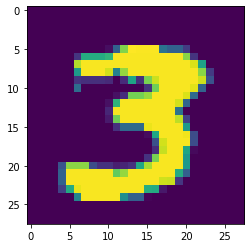

tensor(3)


In [ ]:
#Проверка работы нейросети
import matplotlib.pyplot as plt
plt.imshow(X_train[27])
plt.show()
print(y_train[27])

In [ ]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [ ]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1  = torch.nn.Sigmoid()
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
       
        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.Sigmoid()
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        
        ##self.conv3 = torch.nn.Conv2d(
        ##    in_channels=12, out_channels=24, kernel_size=5, padding=2)
        ##self.act3  = torch.nn.Sigmoid()
        ##self.pool3 = torch.nn.MaxPool2d(kernel_size=2, stride=2)


        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.Sigmoid()
        
        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.Sigmoid()
        
        self.fc4   = torch.nn.Linear(84, 30)
        self.act6  = torch.nn.Sigmoid()

        self.fc3   = torch.nn.Linear(30, 10)
        self.act5 = torch.nn.Softmax()
        
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)

        ##x = self.conv3(x)
        ##x = self.act3(x)
        ##x = self.pool3(x)


        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        
        x = self.fc2(x)
        x = self.act4(x)

        x = self.fc4(x)
        x = self.act6(x)
        
        x = self.fc3(x)
        x = self.act5(x)
        
        return x
    
def init_weights(m):
    if type(m) == torch.nn.Linear:
        torch.nn.init.xavier_normal(m.weight)
        m.bias.data.fill_(0.01)

lenet5 = LeNet5()
lenet5.apply(init_weights)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5 = lenet5.to(device)
##

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=0.001)
##

In [ ]:
batch_size = 200

test_accuracy_history = []
test_loss_history = []
train_loss_history = []
train_batch_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(300):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = lenet5.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        train_batch_loss_history.append(loss_value.tolist()) 

        optimizer.step()
        
    test_preds = lenet5.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())

    train_loss = np.mean(train_batch_loss_history)
    train_loss_history.append(train_loss)


    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)
    
    print(accuracy)
##
lenet5.forward(X_test)


tensor(0.1135)
tensor(0.5665)
tensor(0.7602)
tensor(0.7772)
tensor(0.7830)
tensor(0.7872)
tensor(0.8761)
tensor(0.8841)
tensor(0.9630)
tensor(0.9691)
tensor(0.9730)
tensor(0.9755)
tensor(0.9764)
tensor(0.9783)
tensor(0.9790)
tensor(0.9800)
tensor(0.9809)
tensor(0.9806)
tensor(0.9833)
tensor(0.9809)
tensor(0.9843)
tensor(0.9835)
tensor(0.9820)
tensor(0.9797)
tensor(0.9854)
tensor(0.9846)
tensor(0.9866)
tensor(0.9848)
tensor(0.9870)
tensor(0.9842)
tensor(0.9880)
tensor(0.9863)
tensor(0.9879)
tensor(0.9877)
tensor(0.9889)
tensor(0.9869)
tensor(0.9872)
tensor(0.9865)
tensor(0.9882)
tensor(0.9880)
tensor(0.9882)
tensor(0.9854)
tensor(0.9881)
tensor(0.9881)
tensor(0.9885)
tensor(0.9872)
tensor(0.9896)
tensor(0.9876)
tensor(0.9892)
tensor(0.9888)
tensor(0.9893)
tensor(0.9890)
tensor(0.9894)
tensor(0.9886)
tensor(0.9873)
tensor(0.9877)
tensor(0.9856)
tensor(0.9883)
tensor(0.9881)
tensor(0.9899)
tensor(0.9875)
tensor(0.9901)
tensor(0.9889)
tensor(0.9887)
tensor(0.9874)
tensor(0.9895)
tensor(0.9

tensor([[3.3971e-10, 2.5002e-10, 5.1940e-11,  ..., 1.0000e+00, 2.3927e-10,
         1.3842e-09],
        [2.2057e-09, 3.7523e-09, 1.0000e+00,  ..., 4.3312e-13, 3.0520e-14,
         4.2820e-11],
        [1.6864e-11, 1.0000e+00, 3.6631e-09,  ..., 3.9849e-11, 1.1027e-09,
         1.3966e-13],
        ...,
        [1.7780e-11, 5.1776e-09, 9.2321e-11,  ..., 2.7506e-11, 1.5057e-09,
         1.9347e-07],
        [3.5380e-11, 1.0539e-10, 8.2449e-11,  ..., 5.4334e-14, 2.6023e-08,
         1.7604e-09],
        [2.3656e-09, 2.4141e-11, 9.1693e-09,  ..., 3.8218e-18, 3.4250e-11,
         2.5716e-11]], device='cuda:0', grad_fn=<SoftmaxBackward>)

In [ ]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 393.8988342285156 seconds ---


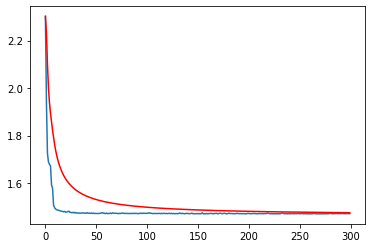

In [ ]:
plt.plot(test_loss_history)
plt.plot(train_loss_history, color='r')

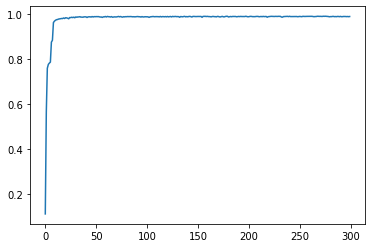

In [ ]:
plt.plot(test_accuracy_history)

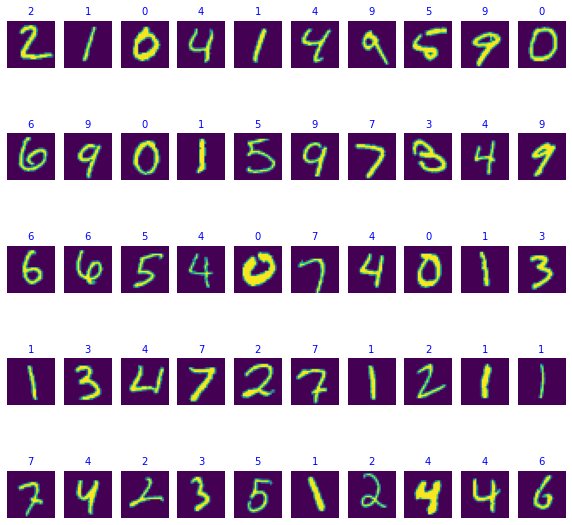

In [ ]:
ROW_IMG = 10
N_ROWS = 5

fig = plt.figure(figsize=(10, 10))
for index in range(1, ROW_IMG * N_ROWS + 1):
    plt.subplot(N_ROWS, ROW_IMG, index)
    plt.axis('off')
    X_to_predict = X_test[index].reshape(1,1,28,28)
    plt.imshow(X_to_predict.cpu().reshape(28,28))
    
    predicted_number = lenet5.forward(X_to_predict).unsqueeze(0).cuda().detach().cpu().clone().numpy()
    
    title = np.argmax(predicted_number)
    plt.title(title, fontsize=10, color='blue' if  title == y_test[index].item() else 'red')